In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import swe2hs as jopack

In [3]:
df= pd.read_csv('manual_stations_validation_data.csv')
df.head()
# df['site_id'].value_counts()
# df=df[df['site_id']=='1AD']
df

,date,HS_[m],SWE_[m],SWE_from_profile_[m],site_id
0,1991-10-18,0.00,0.000000,NaN,1AD
1,1991-10-19,0.13,0.009007,NaN,1AD
2,1991-10-20,0.06,0.009007,NaN,1AD
3,1991-10-21,0.02,0.007656,NaN,1AD
4,1991-10-22,0.00,0.000000,NaN,1AD
...,...,...,...,...,...
223545,2020-04-02,0.07,0.023492,NaN,7ZU
223546,2020-04-03,0.00,0.000000,NaN,7ZU
223547,2020-04-30,0.00,0.000000,NaN,7ZU
223548,2020-05-01,0.01,0.000798,NaN,7ZU


In [4]:
# 1. Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
# 2. Set date as index
df_ts = df.set_index('date')
# 3. Keep only SWE column (rename to 'swe' if you want)
df_ts = df_ts[['SWE_[m]','HS_[m]']].rename(columns={'SWE_[m]': 'swe','HS_[m]':'hsm'})
df_ts

,swe,hsm
date,,
1991-10-18,0.000000,0.00
1991-10-19,0.009007,0.13
1991-10-20,0.009007,0.06
1991-10-21,0.007656,0.02
1991-10-22,0.000000,0.00
...,...,...
2020-04-02,0.023492,0.07
2020-04-03,0.000000,0.00
2020-04-30,0.000000,0.00


In [5]:
swe=df_ts
swe

,swe,hsm
date,,
1991-10-18,0.000000,0.00
1991-10-19,0.009007,0.13
1991-10-20,0.009007,0.06
1991-10-21,0.007656,0.02
1991-10-22,0.000000,0.00
...,...,...
2020-04-02,0.023492,0.07
2020-04-03,0.000000,0.00
2020-04-30,0.000000,0.00


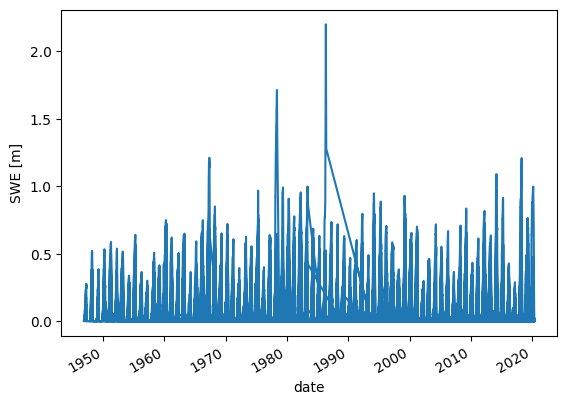

In [6]:
# swe = create_swe(n_years=3)
swe['swe'].plot(ylabel='SWE [m]')
plt.show()


In [ ]:
# swe['swe']

In [ ]:
hs = jopack.convert_1d(swe['swe'], swe_input_unit='m', hs_output_unit='m')

date
1991-10-18    0.000000
1991-10-19    0.104838
1991-10-20    0.085807
1991-10-21    0.061099
1991-10-22    0.000000
                ...   
2020-04-02    0.055845
2020-04-03    0.000000
2020-04-30    0.000000
2020-05-01    0.009285
2020-05-02    0.000000
Length: 223550, dtype: float64

In [14]:
# hs validation/score model

from sklearn.metrics import r2_score
r2_score(swe['hsm'], hs)

0.9735086431002238

In [15]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

MAE=mean_absolute_error(hs,swe['hsm'])
MSE=mean_squared_error(hs,swe['hsm'])
R2=r2_score(hs,swe['hsm'])

print(MAE,MSE,R2)

print('RMSE', MSE**(1/2) )

0.05527727612760367 0.005929547110854098 0.9730957590330616
RMSE 0.07700355258593007
